# TP noté "Machine Learning 1" <a class="tocSkip">
11 janvier 2023


Les données proposées dans ce sujet sont des données synthétiques qui nous permettront d'examiner et mettre en oeuvre plusieurs des méthodes rencontrées dans l'unité. Ce sujet traitera ainsi de

- régression de Poisson et régression linéaire
- clustering (avec KMeans)
- discrimination avec une régression logistique
- estimation des performances par validation croisée
- estimation d'incertitudes par bootstrap

**Instructions** 

- répondre aux questions en utilisant _le langage de votre choix_, soit dans un Notebook Jupyter, soit dans un notebook Rstudio
- vous ferez les calculs et tracerez les figures demandées. Vous insèrerez vos commentaires dans une cellule markdown/texte. _**Il est impératif de commenter ce que vous faites, pourquoi, et les résultats que vous obtenez ; le code seul ne vous rapportera qu'un peu plus de la moitié des points.**_  
- vous pouvez même utiliser plusieurs langages si vous le souhaitez
- tous documents autorisés
- interdiction de communiquer avec d'autres intelligences, humaines ou artificielles. 
- en fin de session, vous rendrez votre notebook en le téléversant sur icampus


**Les parties 2, 3, 4, 5 (partiellement) sont indépendantes** 

## 1 - Données

- Charger le fichier `Data_2023.csv`.Vous appellerez `df` le dataframe.  
- Combien ce fichier contient-il d'exemples, de variables ? 
- Quelles peuvent être les variables catégorielles ? 


In [1]:
import pandas as pd

df = pd.read_csv("Data_2023.csv")
nb_exemples = df.shape[0]
nb_variables = df.shape[1]
print(f"nb exemples : {nb_exemples}\nnb variables : {nb_variables}")

nb exemples : 4500
nb variables : 10


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      4500 non-null   float64
 1   v2      4500 non-null   object 
 2   v3      4500 non-null   float64
 3   v4      4500 non-null   int64  
 4   v5      4500 non-null   int64  
 5   v6      3639 non-null   float64
 6   v7      4500 non-null   int64  
 7   v8      4500 non-null   int64  
 8   v9      4500 non-null   int64  
 9   r       4500 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 351.7+ KB


In [3]:
variables_categorielles = ["v2"]

- Examiner quelles sont les corrélations entre les différentes variables

In [4]:
corr_mat = df.corr()

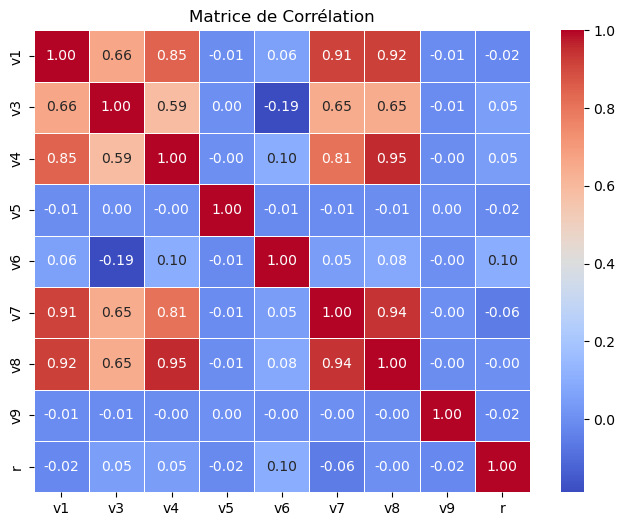

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

- Tracer les histogrammes des variables 1, 3, 5. Peut-on soupçonner qu'il y ait des sous ensembles d'exemples avec des comportements différents ? 

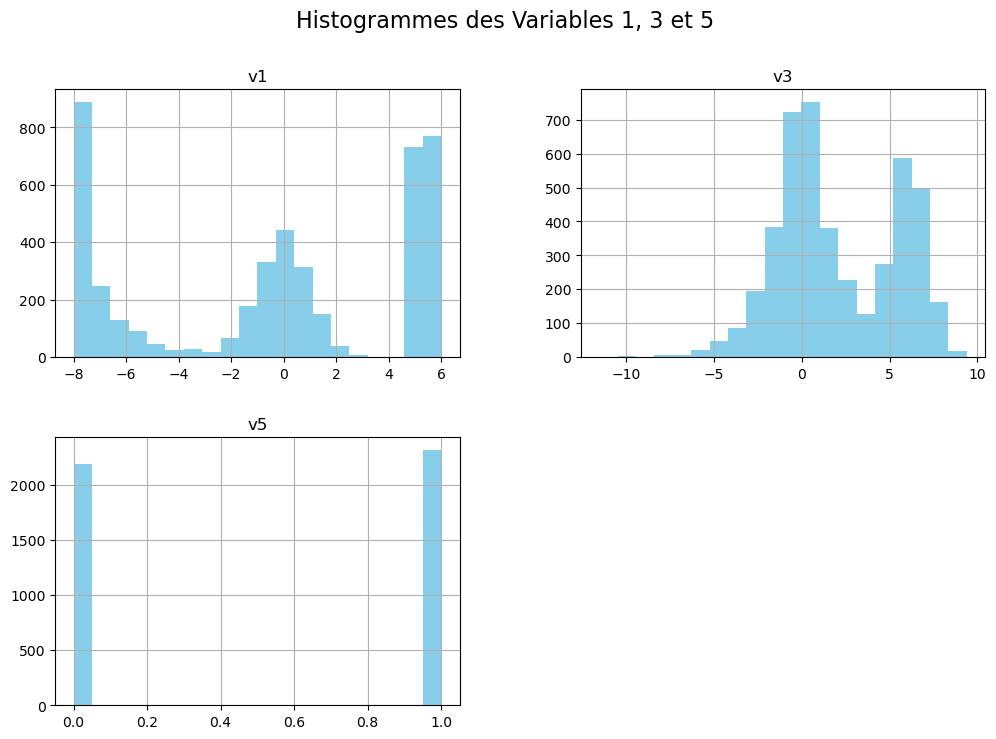

In [6]:
variables_a_examiner = ['v1', 'v3', 'v5']

# Tracer les histogrammes
df[variables_a_examiner].hist(bins=20, figsize=(12, 8), layout=(2, 2), color='skyblue')
plt.suptitle('Histogrammes des Variables 1, 3 et 5', fontsize=16)
plt.show()

## 2 - Conversion

La variable 2, `v2`, est catégorielle. Convertir cette variable en binaire, sur deux niveaux 0 et 1 ; et mettre à jour le dataframe `df`. Si vous n'arriviez pas à réaliser cette opération, charger le résultat `Data_2023b.csv` 

In [7]:
df = pd.read_csv("Data_2023.csv")
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,r
0,-5.244266,A,-2.544469,-12,0,0.0,-7,-19,8,0
1,6.000000,A,4.922793,4,0,NaN,6,11,10,0
2,-7.882469,B,0.087773,-10,0,0.0,-11,-20,8,1
3,-7.155857,A,-0.713578,-13,0,1.0,-10,-24,7,1
4,2.257337,B,-2.380117,5,1,0.0,3,9,10,0


In [8]:
df = pd.get_dummies(df, columns=['v2'], drop_first=True)

df.rename(columns={'v2_B': 'v2'}, inplace=True)
ordre_variables = ["v1","v2","v3","v4","v5","v6","v7","v8","v9", "r"]
df = df[ordre_variables]

df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,r
0,-5.244266,0,-2.544469,-12,0,0.0,-7,-19,8,0
1,6.000000,0,4.922793,4,0,NaN,6,11,10,0
2,-7.882469,1,0.087773,-10,0,0.0,-11,-20,8,1
3,-7.155857,0,-0.713578,-13,0,1.0,-10,-24,7,1
4,2.257337,1,-2.380117,5,1,0.0,3,9,10,0


## 3 - Discrimination (régression logistique)

La réponse est la variable `r`. On cherche à prédire cette réponse `r` à partir des variables explicatives `v1` à `v9`. Si le dataframe contient des variables supplémentaires, vous ne les utiliserez pas pour la discrimination. 

- Séparer les données en une base d'apprentissage et une base de test, avec un ratio 2/3, 1/3. 
- Apprendre une régression logistique (classe `LogisticRegression` en python/sklearn, fonction `glm` avec le paramètre `family=binomial` en R ou en Python avec statsmodels)
- Calculer les scores sur les bases de test et d'apprentissage. Ces scores sont-ils différents, commenter.
- Calculer la matrice de confusion (sur la base de test !). Quel est le taux de faux positifs ? NB - Sous python, vous pouvez utiliser `pd.crosstab` pour calculer cette matrice de confusion
- Apprendre la régression sur la base complète et calculer le score par validation croisée. Comparer le score obtenu par validation croisée à celui obtenu sur la base de test. Quel est l'intérêt de la validation croisée (au moins si les données sont en nombre faible) ?


NB - la variable `v6` présente des valeurs manquantes NA. **Si** cela posait des difficultés à la méthode que vous employez, ce n'est pas obligé, vous pouvez (i) soit supprimer les lignes correspondantes (ii) soit utiliser le fichier `Data_2023c.csv` 

In [9]:
from sklearn.model_selection import train_test_split

df.dropna(subset=['v6'], inplace=True)
X = df.drop('r', axis=1)
y = df['r']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3, random_state=42)

print(X_train)
print(y_train)

            v1  v2        v3  v4  v5   v6  v7  v8  v9
3335 -1.670758   1  0.402051  -4   1  1.0   0  -3  11
3178 -7.637244   0  3.398988  -7   1  0.0  -5 -13  11
477  -7.133861   0  0.003848  -4   0  1.0  -7 -10   7
4195  5.000000   0  5.923067  10   1  0.0   4  14   8
4117  6.000000   0  8.005102   3   0  0.0   7  10   6
...        ...  ..       ...  ..  ..  ...  ..  ..  ..
1400  5.000000   1  6.843876   8   0  0.0   7  15   6
1601  0.172899   0 -1.560672   2   0  3.0   1   2   7
1074  0.157304   1  2.499424  -4   0  0.0   2  -3   9
4342 -0.343280   0 -2.881388   2   0  0.0   3   4   7
3935  6.000000   1  7.083860   4   1  0.0   3   8   6

[2426 rows x 9 columns]
3335    1
3178    1
477     1
4195    1
4117    1
       ..
1400    1
1601    1
1074    1
4342    0
3935    0
Name: r, Length: 2426, dtype: int64


In [10]:
from GLMRegression import *

model = smfGLM(formula='r ~ .', family=sm.families.Binomial())
res = model.fit(X_train, y_train)
GLMsummary(res)

Dep. Variable:,r,No. Observations:,2426
Model:,GLM,Df Residuals:,2416
Model Family:,Binomial,Df Model:,9
Link Function:,Logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-1604.6
Date:,"Tue, 09 Jan 2024",Deviance:,3209.2
Time:,23:57:31,Pearson chi2:,2.46e+03
No. Iterations:,4,Pseudo R-squ. (CS):,0.05926
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,-0.1636,0.173,-0.946,0.344,-0.503,0.175,3.442756e-01,
v1,-0.0030,0.023,-0.135,0.893,-0.047,0.041,8.929537e-01,
v2,-0.2003,0.090,-2.219,0.026,-0.377,-0.023,2.647022e-02,*
v3,0.1190,0.018,6.454,0.000,0.083,0.155,1.087660e-10,***
v4,0.0232,0.054,0.432,0.666,-0.082,0.128,6.656112e-01,
v5,-0.0233,0.090,-0.258,0.796,-0.200,0.154,7.961033e-01,
v6,0.0473,0.007,6.479,0.000,0.033,0.062,9.259036e-11,***
v7,-0.1698,0.055,-3.100,0.002,-0.277,-0.062,1.934990e-03,**
v8,0.0414,0.052,0.802,0.423,-0.060,0.143,4.227939e-01,
v9,-0.0081,0.019,-0.423,0.672,-0.045,0.029,6.720548e-01,


In [15]:
from sklearn.metrics import accuracy_score, mean_squared_error

# train_scores = model.score(X_train, y_train)
# test_scores = model.score(X_test, y_test)
# print("Score_train :", train_scores)
# print("Score_test :", test_scores)

y_train_pred = (model.predict(X_train)>0.5).astype(int)
y_test_pred = (model.predict(X_test)>0.5).astype(int)

print("Score_train :", accuracy_score(y_train, y_train_pred))
print("Score_test :", accuracy_score(y_test, y_test_pred))

Score_train : 0.6030502885408079
Score_test : 0.6265457543281121


In [16]:
from sklearn import metrics

seuil = 0.5
tab = metrics.confusion_matrix(y_test_pred, y_test, labels=[0,1])
print(pd.DataFrame(tab))

accuracy = np.sum(np.diag(tab))/np.sum(np.sum(tab))
print(f"\naccuracy : {accuracy}")

     0    1
0  331  197
1  256  429

accuracy : 0.6265457543281121


In [18]:
specificity = tab[0][0]/(tab[0][0]+tab[0][1])
FPR = (1-specificity)*100
FPR

37.310606060606055

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

model = smfGLM(formula='r ~ .', family=sm.families.Binomial())
df.dropna(subset=['v6'], inplace=True)
X = df.drop('r', axis=1)
y = df['r']

def custom_accuracy(y_true, y_pred):
    y_pred_binary = (y_pred >= 0.5).astype(int)  # Convertir les probabilités en classes binaires
    return np.mean(y_true == y_pred_binary)

# Créer un scorer adapté à la métrique d'accuracy
accuracy_scorer = make_scorer(custom_accuracy, greater_is_better=True)

# Application de la validation croisée avec StratifiedKFold (pour prendre en compte la répartition de la classe cible)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring=accuracy_scorer)

# Afficher la moyenne des scores d'accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f'Accuracy mean: {mean_accuracy}')

Accuracy mean: 0.6062140060764546


## 4 - Régression linéaire et de Poisson

On est ennuyé avec les valeurs manquantes dans la variable `v6`. On décide d'imputer ces valeurs manquantes. Pour cela, on va tenter de prédire les valeurs manquantes à partir des autres variables. 

Sous R, vous pourrez utilier la fonction `lm`, et sous Python, vous pourrez charger l'équivalent par `from LinearRegression_in_Python_like_in_R import lm`. Vous pouvez également utiliser un modèle linéaire généralisé `glm` ; sous Python vous pourrez utiliser la fonction `glm` de statsmodels, et les fonctions de résumé et de diagnostique selon `from GLMRegression_in_Python_like_in_R import GLMsummary, glm_residplot`


- Suivant les outils que vous utilisez, vous pourrez ou pas utiliser la base `df` avec les valeurs manquantes. Le cas échéant, supprimer toutes les lignes sans NA pour la variable `v6`. Sous Python, vous pourrez utiliser `.dropna`, mais également`.notna()` pour accéder aux indices des lignes ne contenant pas de NA, et `.isna()` pour les lignes avec NA. 

**4.1 - Régression linéaire**
- Effectuer une prédiction lineaire de `v6` en fonction des autres variables explicatives (les variables en `v.`, pas `r`)
- Calculer l'erreur quadratique moyenne entre les valeurs exactes et prédites de `v6`. Vous pouvez éventuellement directement accéder à un prédicteur via une méthode `.predict()`, voire même directement aux residus via un attribut `.residuals` 
- Au vu des résultats, quelles sont les variables importantes
- Examiner les graphes de diagnostic. Pouvez vous soupçonner une non linarité, pourquoi ? 
- Effectuer une nouvelle prédiction en ajoutant la variable `v3**2`. Que devient alors l'erreur quadratique moyenne ? La variable v5 est-elle utile ? 
- Si vous ajoutiez `v5**2` plutôt que `v3**2`, quelle seraient l'erreur quadratique moyenne ? Commentaires. 

In [20]:
from LinearRegression_in_Python_like_in_R import lm, summary, vif

# Re Chargement et traitement des données 
df = pd.read_csv("Data_2023.csv")
df = pd.get_dummies(df, columns=['v2'], drop_first=True)
df.rename(columns={'v2_B': 'v2'}, inplace=True)
ordre_variables = ["v1","v2","v3","v4","v5","v6","v7","v8","v9", "r"]
df = df[ordre_variables]


df.dropna(subset=['v6'], inplace=True)
model = lm(formula='v6 ~ . -r', data=df)

preds = model.predict()
eqm = sum((preds-df['v6'])**2)/preds.size
print(eqm)

model.summary()

51.26417881353796
Call
smf.ols('v6 ~ . -r', data=...)

Coefficients:
           Estimate  Std. Error    t value      Pr(>|t|) code
Intercept  5.058715    0.483664  10.459143  3.029336e-25  ***
v1         0.177173    0.064144   2.762135  5.771373e-03   **
v2         0.219066    0.255833   0.856283  3.918977e-01     
v3        -0.929856    0.047613 -19.529450  7.589854e-81  ***
v4         0.181525    0.150430   1.206704  2.276247e-01     
v5        -0.306159    0.255852  -1.196625  2.315310e-01     
v7        -0.079451    0.153076  -0.519029  6.037718e-01     
v8         0.097024    0.145161   0.668391  5.039263e-01     
v9        -0.003912    0.054108  -0.072300  9.423675e-01     

Residuals:
         Min       1Q    Median        3Q        Max
0 -14.227685 -2.78448 -1.404669  0.171671  64.280515
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.1688 on 3630 degrees of freedom
Multiple R-squared:  0.1093,	Adjusted R-squared:  0.107 
F-statist

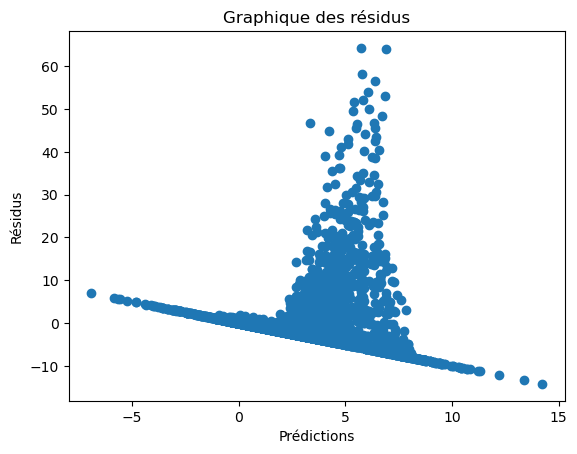

In [21]:
plt.scatter(preds, model.residuals)
plt.title("Graphique des résidus")
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.show()

In [22]:
model2 = lm(formula='v6 ~ . + I(v3**2) -r', data=df)
model2.summary()

preds2 = model2.predict()
eqm = sum((preds2-df['v6'])**2)/preds2.size
print(eqm)

Call
smf.ols('v6 ~ . + I(v3**2) -r', data=...)

Coefficients:
            Estimate  Std. Error    t value       Pr(>|t|) code
Intercept   7.328869    0.456185  16.065563   3.684655e-56  ***
v1          0.880029    0.065648  13.405174   4.977735e-40  ***
v2          0.419588    0.236575   1.773597   7.621361e-02    .
v3         -0.099470    0.055197  -1.802093   7.161374e-02    .
v4          0.125110    0.139044   0.899788   3.682928e-01     
v5         -0.499046    0.236581  -2.109402   3.497819e-02    *
v7         -0.252464    0.141641  -1.782415   7.476509e-02    .
v8          0.042293    0.134174   0.315207   7.526224e-01     
v9          0.025834    0.050020   0.516470   6.055576e-01     
I(v3 ** 2) -0.272614    0.010940 -24.919511  1.158909e-126  ***

Residuals:
        Min        1Q    Median        3Q        Max
0 -10.32473 -3.236347 -1.109787  0.892146  60.829774
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.6253 on 3629 degrees 

In [23]:
model2 = lm(formula='v6 ~ . + I(v5**2) -r', data=df)
model2.summary()

preds2 = model2.predict()
eqm = sum((preds2-df['v6'])**2)/preds2.size
print(eqm)

Call
smf.ols('v6 ~ . + I(v5**2) -r', data=...)

Coefficients:
            Estimate  Std. Error    t value      Pr(>|t|) code
Intercept   5.058715    0.483664  10.459143  3.029336e-25  ***
v1          0.177173    0.064144   2.762135  5.771373e-03   **
v2          0.219066    0.255833   0.856283  3.918977e-01     
v3         -0.929856    0.047613 -19.529450  7.589854e-81  ***
v4          0.181525    0.150430   1.206704  2.276247e-01     
v5         -0.153079    0.127926  -1.196625  2.315310e-01     
v7         -0.079451    0.153076  -0.519029  6.037718e-01     
v8          0.097024    0.145161   0.668391  5.039263e-01     
v9         -0.003912    0.054108  -0.072300  9.423675e-01     
I(v5 ** 2) -0.153079    0.127926  -1.196625  2.315310e-01     

Residuals:
         Min       1Q    Median        3Q        Max
0 -14.227685 -2.78448 -1.404669  0.171671  64.280515
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.1688 on 3630 degrees of freedom


**4.2 - Régression de Poisson**
- Effectuer une régression de Poisson de `v6` en fonction des autres variables explicatives (les variables en `v.`, pas `r`)
- Reprendre toutes les autres questions précémment traitées avec la régression linéaire (performances, variables à retenir, graphes de diagnostic, non-linéarité...)
- Comparer les résulats obtenus par les deux approches et commenter

In [24]:
modelPoisson = smfGLM(formula='v6 ~ . -r', family=sm.families.Poisson())
res = modelPoisson.fit(df)
GLMsummary(res)

preds = modelPoisson.predict(df)
eqm = sum((preds-df['v6'])**2)/preds.size
print(eqm)

Dep. Variable:,v6,No. Observations:,3639
Model:,GLM,Df Residuals:,3630
Model Family:,Poisson,Df Model:,8
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-16488.
Date:,"Wed, 10 Jan 2024",Deviance:,29739.
Time:,00:01:12,Pearson chi2:,4.64e+04
No. Iterations:,8,Pseudo R-squ. (CS):,0.8780
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,1.4448,0.040,36.386,0.000,1.367,1.523,7.027857e-290,***
v1,0.0573,0.005,11.614,0.000,0.048,0.067,3.485681e-31,***
v2,0.0764,0.022,3.546,0.000,0.034,0.119,3.913776e-04,***
v3,-0.2838,0.003,-84.506,0.000,-0.290,-0.277,0.000000e+00,***
v4,0.0796,0.013,6.181,0.000,0.054,0.105,6.370446e-10,***
v5,-0.0966,0.022,-4.483,0.000,-0.139,-0.054,7.369696e-06,***
v7,-0.0181,0.013,-1.410,0.158,-0.043,0.007,1.584303e-01,
v8,0.0266,0.012,2.148,0.032,0.002,0.051,3.173888e-02,*
v9,-0.0108,0.005,-2.378,0.017,-0.020,-0.002,1.742989e-02,*


57.913700618974815


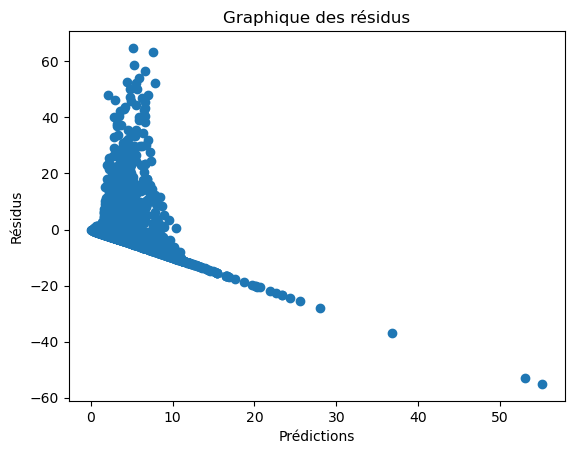

In [25]:
residuals = df['v6']-preds
plt.scatter(preds, residuals)
plt.title("Graphique des résidus")
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.show()

In [26]:
modelPoisson2 = smfGLM(formula='v6 ~ . + I(v3**2) -r', family=sm.families.Poisson())
res = modelPoisson2.fit(df)
GLMsummary(res)

preds = modelPoisson2.predict(df)
eqm = sum((preds-df['v6'])**2)/preds.size
print(eqm)

Dep. Variable:,v6,No. Observations:,3639
Model:,GLM,Df Residuals:,3629
Model Family:,Poisson,Df Model:,9
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-2732.9
Date:,"Wed, 10 Jan 2024",Deviance:,2228.3
Time:,00:01:14,Pearson chi2:,2.18e+03
No. Iterations:,100,Pseudo R-squ. (CS):,0.9999
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,2.7041,0.039,68.677,0.000,2.627,2.781,0.000000e+00,***
v1,0.5039,0.008,60.881,0.000,0.488,0.520,0.000000e+00,***
v2,0.0497,0.022,2.259,0.024,0.007,0.093,2.387357e-02,*
v3,0.2722,0.011,23.810,0.000,0.250,0.295,2.639399e-125,***
v4,0.0836,0.013,6.219,0.000,0.057,0.110,5.012063e-10,***
v5,-0.0162,0.022,-0.739,0.460,-0.059,0.027,4.596941e-01,
v7,-0.0096,0.013,-0.716,0.474,-0.036,0.017,4.736989e-01,
v8,0.0092,0.013,0.714,0.475,-0.016,0.034,4.749417e-01,
v9,0.0107,0.005,2.346,0.019,0.002,0.020,1.895890e-02,*
I(v3 ** 2),-0.6091,0.001,-536.184,0.000,-0.611,-0.607,0.000000e+00,***


4.235022024657951


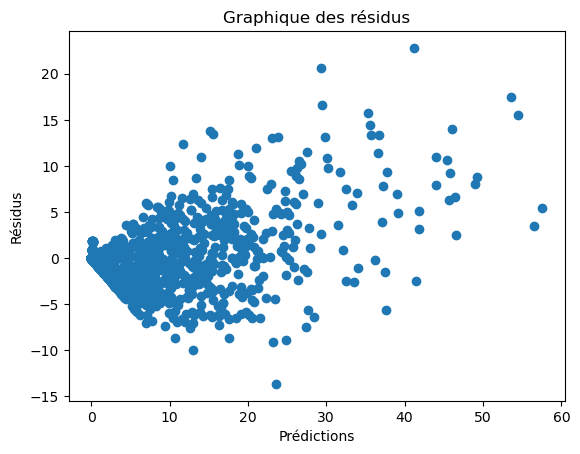

In [27]:
residuals = df['v6']-preds
plt.scatter(preds, residuals)
plt.title("Graphique des résidus")
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.show()

**4.3 - Imputation**
- Rempacer les données manquantes dans `df` en prédisant les valeurs manquantes à l'aide du modèle linéaire. 
Si vous ne voyez pas comment faire, utiliser `Data_2023c.csv` dans la suite. 
- Enfin, calculez une régression logistique pour prédire la variable $r$ et évaluez les performances (sur une base de test ou par validation croisée, comme en 3). Comparez le score au score obtenu précédentemment.  

In [28]:
#Re chargement et traitement
df = pd.read_csv("Data_2023.csv")
df = pd.get_dummies(df, columns=['v2'], drop_first=True)
df.rename(columns={'v2_B': 'v2'}, inplace=True)
ordre_variables = ["v1","v2","v3","v4","v5","v6","v7","v8","v9", "r"]
df = df[ordre_variables]
#########################

data_to_predict = df[df["v6"].isna()==True]
index_to_predict = data_to_predict.index

model = lm(formula='v6 ~ . + I(v3**2) -r', data=df)
v6_preds = model.predict(data_to_predict)

df.loc[index_to_predict, 'v6'] = v6_preds

df['v6'].isna().sum()

0

In [29]:
model = smfGLM(formula='r ~ .', family=sm.families.Binomial())
X = df.drop('r', axis=1)
y = df['r']

def custom_accuracy(y_true, y_pred):
    y_pred_binary = (y_pred >= 0.5).astype(int)  # Convertir les probabilités en classes binaires
    return np.mean(y_true == y_pred_binary)

# Créer un scorer adapté à la métrique d'accuracy
accuracy_scorer = make_scorer(custom_accuracy, greater_is_better=True)

# Application de la validation croisée avec StratifiedKFold (pour prendre en compte la répartition de la classe cible)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring=accuracy_scorer)

# Afficher la moyenne des scores d'accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f'Accuracy mean: {mean_accuracy}')

Accuracy mean: 0.6033333333333333


## Clustering

Comme vous l'avez peut-être observé, on soupçonne que les données puissent être en fait composées de différents *clusters*, qui possèderaient des caractéristiques différentes. L'idées est alors qu'on pourrait -- peut-être, améliorer les performances de discrimination et utilisant des modèles différents sur chacun des clusters. 

Au vu des histogrammes, on teste l'hypothèse de 3 clusters. 

- Utiliser la méthode kmeans pour définir 3 clusters. Tracer les histogrammes de répartition des labels identifiés par kmeans. 
- Ajouter au dataframe une colonne 'km_labels' contenant le label du cluster pour chaque exemple. 




NB - Sous Python 
```
from sklearn.cluster import KMeans
kmeans = KMeans(...
```



<Axes: ylabel='Count'>

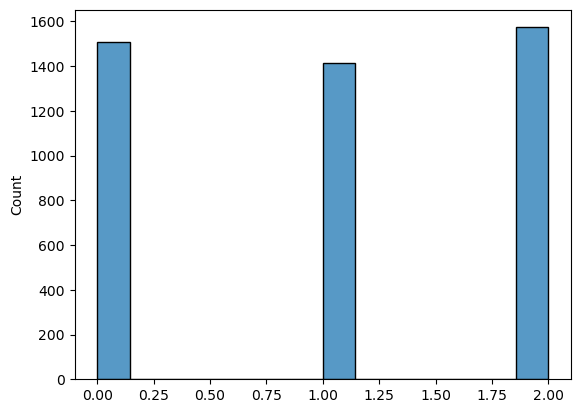

In [32]:
from sklearn.cluster import KMeans

# Variables prédictives (axis = 1 : drop a column)
X_kmeans = df.drop(['r'], axis=1)

# On définit 3 clusters pour 10 itérations
kmeans = KMeans(n_clusters=3, n_init=10)

# On prédit le clustering de y_kmeans
y_kmeans = kmeans.fit_predict(X_kmeans)

# On montre l'histogramme des labels identifiés par kmeans
sns.histplot(y_kmeans)

In [33]:
df['km_labels'] = y_kmeans
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,r,km_labels
0,-5.244266,0,-2.544469,-12,0,0.000000,-7,-19,8,0,0
1,6.000000,0,4.922793,4,0,5.222095,6,11,10,0,2
2,-7.882469,1,0.087773,-10,0,0.000000,-11,-20,8,1,0
3,-7.155857,0,-0.713578,-13,0,1.000000,-10,-24,7,1,0
4,2.257337,1,-2.380117,5,1,0.000000,3,9,10,0,2


- Séparer votre dataframe en une base d'apprentissage `train` (les 3000 premières lignes) et une base de test `test` (les 1500 suivantes). 
- Pour chacun des groupes (vous pouvez filtrer vos données sur la valeur de la colonne 'km_labels')
   - calculer un modèle de régression logistique 
   - et les performances correspondantes (score $s_i$, taux de faux positifs $t_i$) sur la base de test, pour les exemples du même groupe
   - si $n_1$, $n_2$, $n_3$ sont les nombres d'exemples dans chacun des groupes, $s_1$, $s_2$, $s_3$ les scores dans chaque groupe, alors le score global sera 
$$
   s = \frac{n_1s_1  + n_2s_2 + n_3s_3} {n_1  + n_2 + n_3}
$$
   et pour le taux de faux positifs,
$$
   t = \frac{n_1t_1  + n_2t_2 + n_3t_3} {n_1  + n_2 + n_3}
$$
- Comparez les performances aux performances obtenues précédemment et commentez   

In [36]:
# Séparation en une base d'apprentissage train et une base de test
train = df.iloc[:3000]
test = df.iloc[3000:]

In [37]:
from sklearn.linear_model import LogisticRegression

clusters = df['km_labels'].unique()
n = np.zeros(len(clusters))
s = np.zeros(len(clusters))
t = np.zeros(len(clusters))

for cluster in clusters :
    # Sélection des ensembles de test et train correspondant au cluster
    train_cluster = train[train['km_labels']==cluster]
    test_cluster = test[test['km_labels']==cluster]
    # Séparation en X et y
    y_train = train_cluster['r']
    X_train = train_cluster.drop('r', axis=1)
    y_test = test_cluster['r']
    X_test = test_cluster.drop('r', axis=1)
    
    # Calcul modèle de régression logistique
    model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
#     model = smfGLM(formula='r ~ .', family=sm.families.Binomial())
#     res = model.fit(X_train, y_train)
#     GLMsummary(res)
    

    # Calcul des performances
    train_scores = model.score(X_train, y_train)
    test_scores = model.score(X_test, y_test)
    
    # Prédictions
    y_train_pred = (model.predict(X_train)>0.5).astype(int)
    y_test_pred = (model.predict(X_test)>0.5).astype(int)
    # Taux de faux positifs
    tab = metrics.confusion_matrix(y_test_pred, y_test, labels=[0,1])
    specificity = tab[0][0]/(tab[0][0]+tab[0][1])
    FPR = 1-specificity
    
    n[cluster] = test.shape[0]
    s[cluster] = test_scores*n[cluster]
    t[cluster] = FPR*n[cluster]
    
    # Affichage des résultats
    print("Cluster", cluster)
    print("Score_train :", train_scores*100)
    print("Score_test :", test_scores*100)
    print(f"FPR : {FPR*100}\n")
    print(tab)
    print()
    
global_score = s.sum()/n.sum()
global_fpr = t.sum()/n.sum()
print("global score : ", global_score*100)
print("global FPR : ", global_fpr*100)

Cluster 0
Score_train : 75.7396449704142
Score_test : 76.41129032258065
FPR : 28.467153284671532

[[196  78]
 [ 39 183]]

Cluster 2
Score_train : 78.85548011639185
Score_test : 79.74217311233886
FPR : 21.034482758620687

[[229  61]
 [ 49 204]]

Cluster 1
Score_train : 79.26701570680629
Score_test : 77.00650759219089
FPR : 21.476510067114095

[[117  32]
 [ 74 238]]

global score :  77.71999034237012
global FPR :  23.6593820368021


## Évaluation de la stabilité par bootstrap

- Ré-échantillonnez l'ensemble `train` et générez le même nombre d'échantillons, puis apprenez vos modèles et calculez le score global comme précédemment sur la base de test _inchangée_. 
- Effectuez ceci disons B=200 fois, en stockant les valeurs de scores et taux de faux positifs. 
- Tracez les histogrammes des valeurs obtenues
- Donnez les moyennes et intervalles de confiance correspondant. 

In [40]:
from sklearn.linear_model import LinearRegression

train = df.iloc[:3000, :]
test = df.iloc[3000:4500, :]

X_train = train.drop(columns=["r"])
y_train = train["r"]
X_test = test.drop(columns=["r"])
y_test = test["r"]

model_b = LinearRegression()
model_b.fit(X_train, y_train)

y_pred_b = model_b.predict(X_test)
mse_squared_b = mean_squared_error(y_test, y_pred_b)
mse_squared_b

0.23345041318987386

In [41]:
I = np.random.choice(df.shape[0], size=df.shape[0], )  # Choix des index

In [42]:
test = df.iloc[~I, :]
test

,v1,v2,v3,v4,v5,v6,v7,v8,v9,r,km_labels
1947,-0.154071,1,-0.475813,4,0,21.0,-3,0,9,1,1
2624,0.979600,1,-1.664255,-3,1,0.0,3,0,12,0,1
1671,-0.107637,1,1.880330,4,1,4.0,2,7,6,0,2
3902,-7.835682,1,0.128930,-8,1,0.0,-9,-16,7,0,0
3884,-6.884922,1,-0.975350,-12,1,0.0,-5,-16,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4286,0.039107,1,1.360269,2,1,7.0,0,3,8,0,1
582,0.347591,1,-0.556375,-3,1,13.0,0,-4,10,1,1
2015,-6.913303,0,0.294545,-10,0,0.0,-10,-21,6,1,0
2833,-7.144497,1,1.189762,-9,1,0.0,-10,-19,10,0,0


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

from GLMRegression_in_Python_like_in_R import GLMsummary, glm_residplot
from LinearRegression_in_Python_like_in_R import lm, summary, vif
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.cluster import KMeans

In [46]:
def bootfn(data, index):
    train = data.iloc[index, :]
    test = data.iloc[~index, :]
    X_train = train.drop(columns=["r"])
    y_train = train["r"]
    X_test = test.drop(columns=["r"])
    y_test = test["r"]
    model_b = LinearRegression().fit(X_train, y_train)
    y_pred_test = model_b.predict(X_test)
    score=model.score(y_test, y_pred_test)
    confusion_bootstrap = confusion_matrix(y_test, y_pred_test)
    false_positive_rate_bootstrap = 1-(confusion_bootstrap[0][0] / confusion_bootstrap[0].sum())
    
    return score, false_positive_rate_bootstrap



B = 200

for b in range(B):
    I = np.random.choice(df.shape[0], size=df.shape[0], )  # Choix des index
    score_bootstrap, false_positive_rate_bootstrap = bootfn(df, I)
    bootstrap_scores.append(score_bootstrap)
    bootstrap_false_positive_rates.append(false_positive_rate_bootstrap)


ValueError: Found input variables with inconsistent numbers of samples: [45000, 4500]

In [47]:
# Nombre d'itérations bootstrap (B)
B = 200

# Initialiser les listes pour stocker les scores et taux de faux positifs
bootstrap_scores = []
bootstrap_false_positive_rates = []

# Boucle bootstrap
for _ in range(B):
    # Ré-échantillonnage avec remplacement pour créer un nouvel ensemble d'apprentissage
    bootstrap_train = train.sample(n=len(train), replace=True)

    # Séparation des données en variables explicatives (X) et variable cible (y) pour le nouvel ensemble
    X_bootstrap_train = bootstrap_train.drop(['r', 'km_labels'], axis=1)
    y_bootstrap_train = bootstrap_train['r']

    # Création et entraînement d'un modèle de régression logistique sur le nouvel ensemble
    model = LogisticRegression(random_state=42)
    model.fit(X_bootstrap_train, y_bootstrap_train)

    # Prédiction sur la base de test inchangée
    y_pred_test = model.predict(test.drop(['r', 'km_labels'], axis=1))

    # Calculer le score et la matrice de confusion pour le bootstrap actuel
    score_bootstrap = accuracy_score(test['r'], y_pred_test)
    confusion_bootstrap = confusion_matrix(test['r'], y_pred_test)

    # Calculer le taux de faux positifs pour le bootstrap actuel
    false_positive_rate_bootstrap = 1-(confusion_bootstrap[0][0] / confusion_bootstrap[0].sum())

    # Stocker les résultats dans les listes
    bootstrap_scores.append(score_bootstrap)
    bootstrap_false_positive_rates.append(false_positive_rate_bootstrap)


In [48]:
# Calculer les moyennes et intervalles de confiance correspondants
mean_score = np.mean(bootstrap_scores)
mean_false_positive_rate = np.mean(bootstrap_false_positive_rates)

In [49]:
mean_score

0.6179744444444444

In [50]:
mean_false_positive_rate

0.43469561113732896